In [6]:
df['mpg'].astype('int')

0      18
1      15
2      18
3      16
4      17
5      15
6      14
7      14
8      14
9      15
10     15
11     14
12     15
13     14
14     24
15     22
16     18
17     21
18     27
19     26
20     25
21     24
22     25
23     26
24     21
25     10
26     10
27     11
28      9
29     27
       ..
368    27
369    34
370    31
371    29
372    27
373    24
374    23
375    36
376    37
377    31
378    38
379    36
380    36
381    36
382    34
383    38
384    32
385    38
386    25
387    38
388    26
389    22
390    32
391    36
392    27
393    27
394    44
395    32
396    28
397    31
Name: mpg, Length: 398, dtype: int32

In [4]:
features_df = pd.get_dummies(df, columns=['origin','model year'])
features_df

NameError: name 'pd' is not defined

In [5]:
import pandas as pd
# Varies with sklearn version
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

# Load the data set
df = pd.read_csv("auto_mpg.csv")

# Remove the fields from the data set that we don't want to include in our model

del df['car name']

# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(df, columns=['origin','model year'])
features_df
# Remove the sale price from the feature data
del features_df['mpg']

# Create the X and y arrays
X = features_df.as_matrix()
y = df['mpg'].as_matrix()

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit regression model
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'model/trained_mpg_classifier_model.pkl')

# Find the error rate on the training set
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)

# Find the error rate on the test set
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mae)


Training Set Mean Absolute Error: 1.0279
Test Set Mean Absolute Error: 2.3139


E:\anaconda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [6]:
#gradiant_boosting
train_val=pd.DataFrame({"Actual":y_train,"Pred":model.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":model.predict(X_test)})
test_val.head()

Actual       Pred
0    28.0  23.959973
1    25.0  23.381930
2    32.1  40.061398
3    11.0  14.997177
4    14.0  14.287058

([array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
         0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
  array([0., 0., 2., 0., 0., 0., 0., 0.,

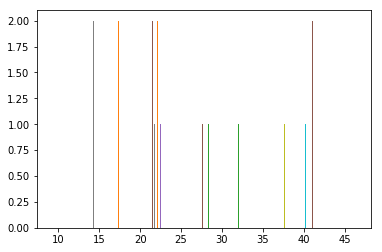

In [7]:
#gradiant_boosting
%matplotlib inline
from matplotlib.pyplot import hist
hist(train_val,bins=19)

In [14]:
#linear model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)
pred=reg.predict(X_test)
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
mae = mean_absolute_error(y_test,pred)
print("Test Set Mean Absolute Error : %.4f" % mae)

Training Set Mean Absolute Error: 1.0279
Test Set Mean Absolute Error : 2.4729


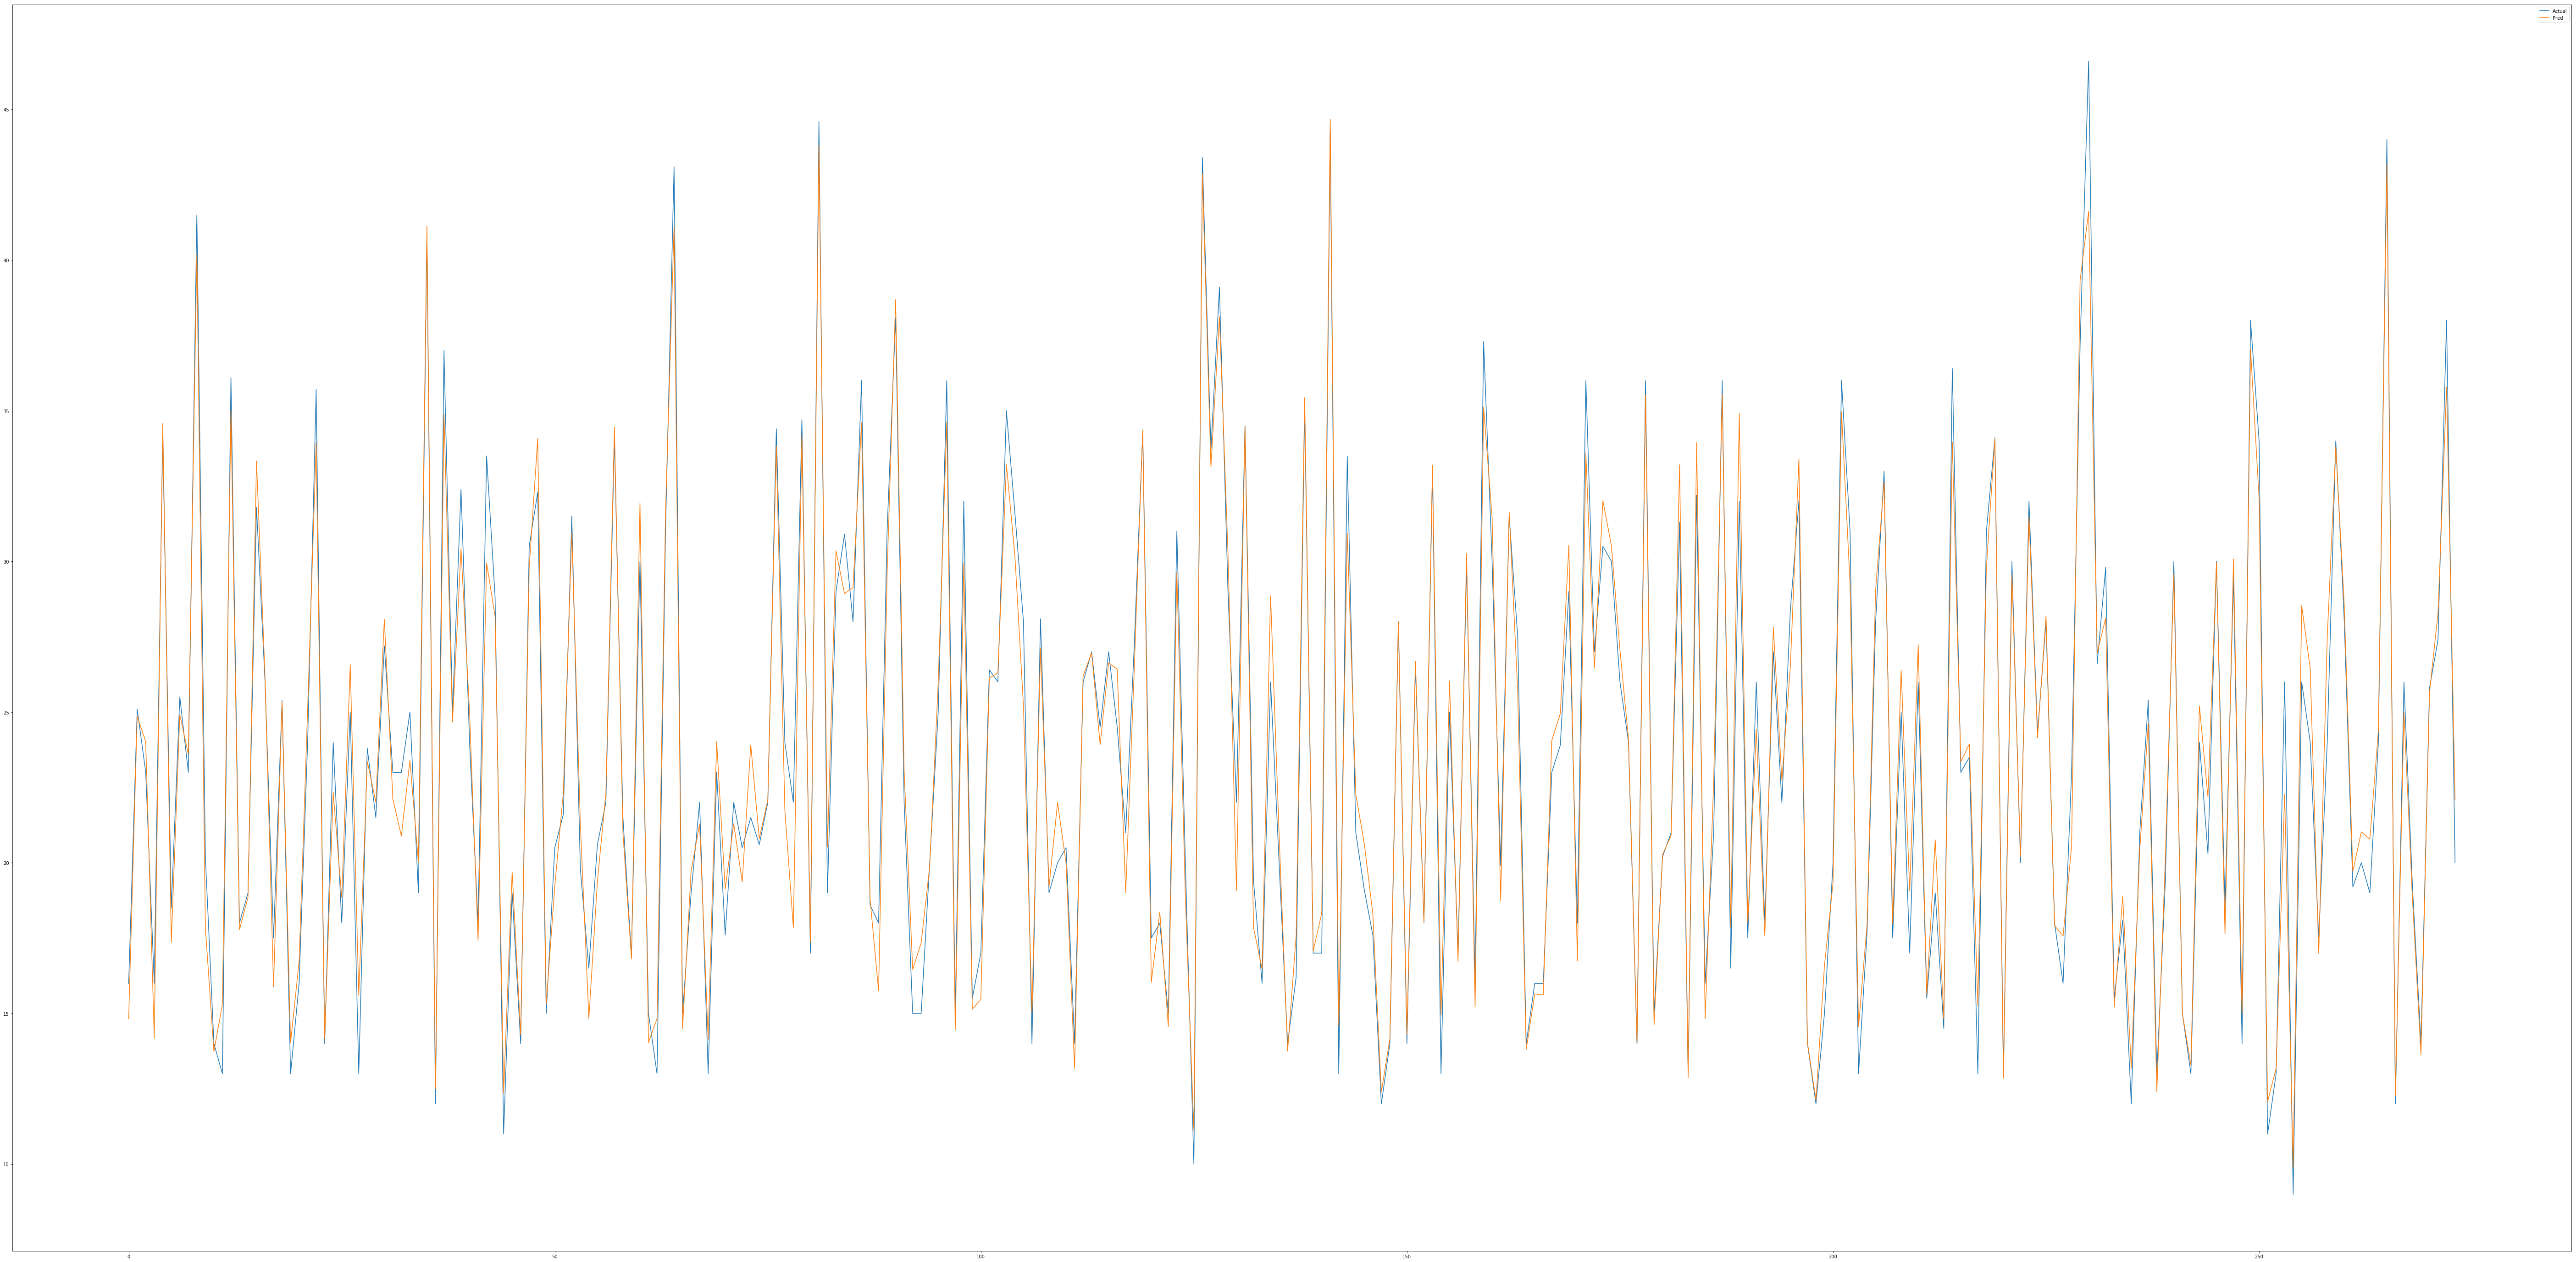

In [31]:
#linear_model
train_val=pd.DataFrame({"Actual":y_train,"Pred":model.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":model.predict(X_test)})
test_val.head()

%matplotlib inline
train_val.plot(figsize=(100,50))

In [16]:
#Random_forest_regression
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit (X_train,y_train)
pred=reg.predict(X_test)
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
mae = mean_absolute_error(y_test,pred)
print("Test Set Mean Absolute Error : %.4f" % mae)

Training Set Mean Absolute Error: 1.0279
Test Set Mean Absolute Error : 2.9486


E:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
#Join Predicted values for X Train with Actual Values in a Dataframe and similarly for Test set
#Also add results of various methods on various metrics to a dataframe and visualize them
#If possible plot the error at each test point for each method as a line and create a plot that compares methods
train_val=pd.DataFrame({"Actual":y_train,"Pred":model.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":model.predict(X_test)})
print test_val.head(),train_val.head()


   Actual       Pred
0    28.0  23.959973
1    25.0  23.381930
2    32.1  40.061398
3    11.0  14.997177
4    14.0  14.287058    Actual       Pred
0    16.0  14.825493
1    25.1  24.868669
2    23.0  24.011283
3    16.0  14.180821
4    34.2  34.573191


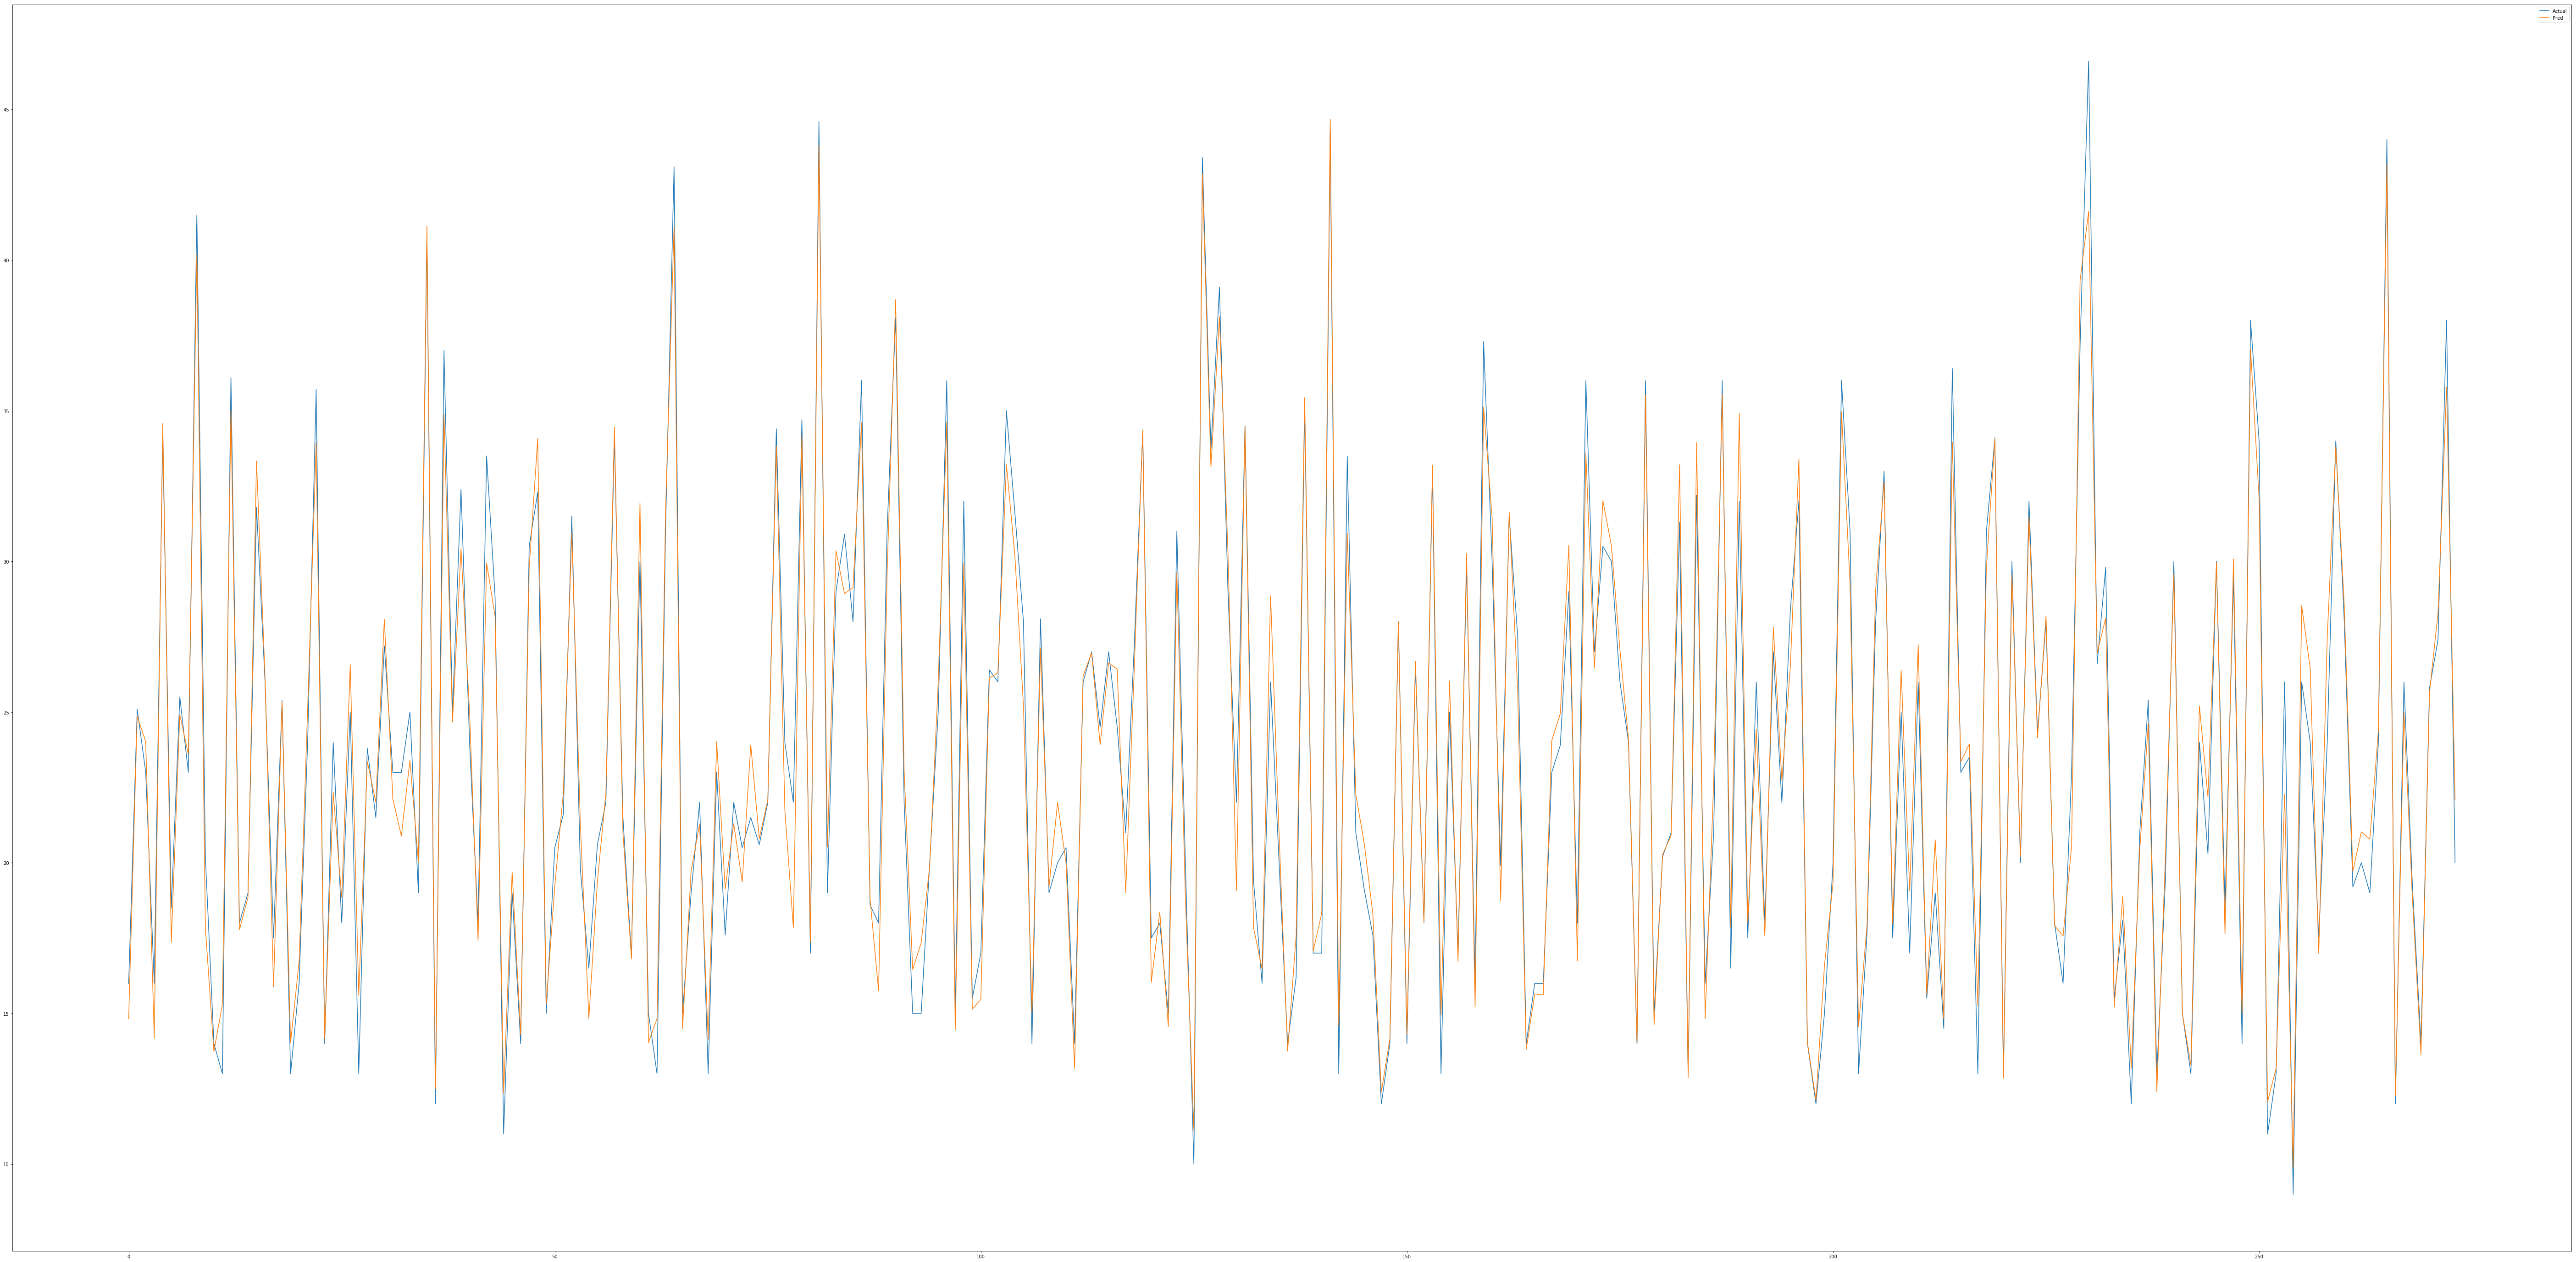

In [19]:

%matplotlib inline
train_val.plot(figsize=(100,50))

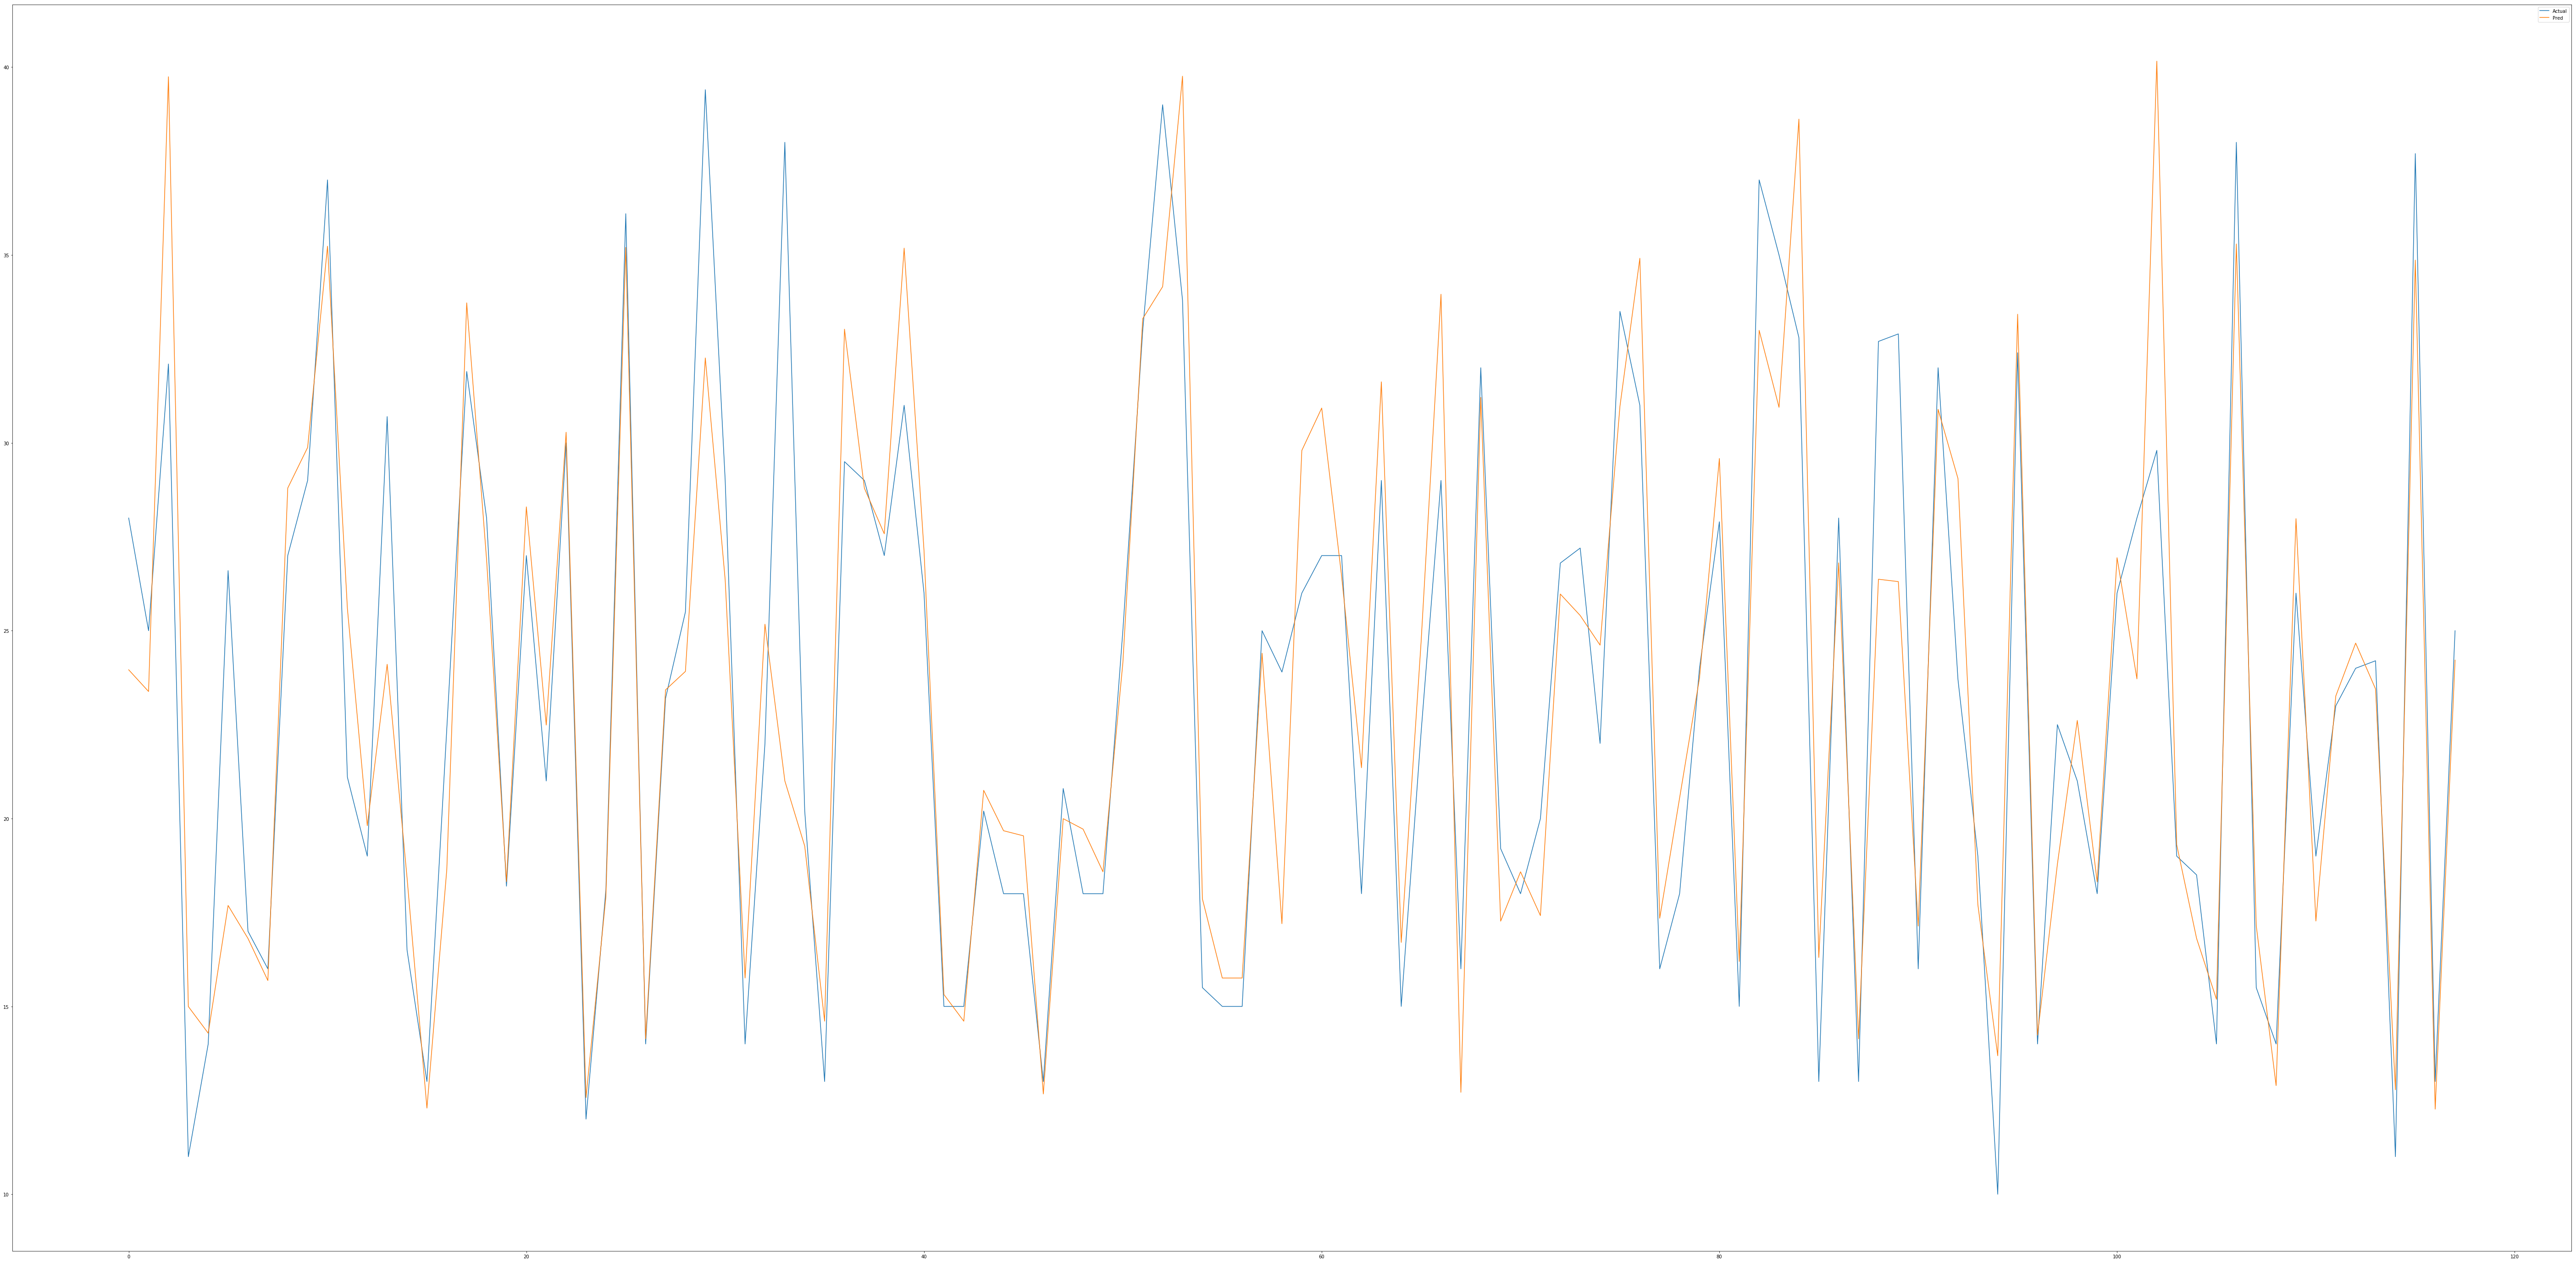

In [20]:
%matplotlib inline
test_val.plot(figsize=(100,50))

In [1]:
import pandas
import webbrowser
import os

# Read the dataset into a data table using Pandas
data_table = pandas.read_csv("auto_mpg.csv")

# Create a web page view of the data for easy viewing
html = data_table[0:100].to_html()

# Save the html to a temporary file
with open("data.html", "w") as f:
    f.write(html)

# Open the web page in our web browser
full_filename = os.path.abspath("data.html")
webbrowser.open("file://{}".format(full_filename))

True